In [1]:
! pip install setuptools --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.1 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [1]:
! pip install -q git+https://github.com/mert-kurttutan/torchview.git@merge-output
! pip install -q -U graphviz
! pip install -q transformers
! pip install -q sentencepiece

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 47 kB 2.4 MB/s 
     |████████████████████████████████| 5.8 MB 5.3 MB/s 
     |████████████████████████████████| 182 kB 46.4 MB/s 
     |████████████████████████████████| 7.6 MB 44.6 MB/s 
     |████████████████████████████████| 1.3 MB 5.2 MB/s 


In [2]:
from torchview import draw_graph
import torchtext
from torch import nn
import torch
import graphviz

# when running on VSCode run the below command
# svg format on vscode does not give desired result
graphviz.set_jupyter_format('png')

'svg'

This notebook is to demonstrate torchview package on famous NLP models

* RNN rolled
* RNN unrolled
* BERT-like model (ROBERTA)

Get config of t5_11b

In [3]:
import requests, json
t5_3b_dict = json.loads(requests.get('https://huggingface.co/t5-3b/resolve/main/config.json').text)
t5_3b_dict

{'architectures': ['T5WithLMHeadModel'],
 'd_ff': 16384,
 'd_kv': 128,
 'd_model': 1024,
 'decoder_start_token_id': 0,
 'dropout_rate': 0.1,
 'eos_token_id': 1,
 'initializer_factor': 1.0,
 'is_encoder_decoder': True,
 'layer_norm_epsilon': 1e-06,
 'model_type': 't5',
 'n_positions': 512,
 'num_heads': 32,
 'num_layers': 24,
 'output_past': True,
 'pad_token_id': 0,
 'relative_attention_num_buckets': 32,
 'task_specific_params': {'summarization': {'early_stopping': True,
   'length_penalty': 2.0,
   'max_length': 200,
   'min_length': 30,
   'no_repeat_ngram_size': 3,
   'num_beams': 4,
   'prefix': 'summarize: '},
  'translation_en_to_de': {'early_stopping': True,
   'max_length': 300,
   'num_beams': 4,
   'prefix': 'translate English to German: '},
  'translation_en_to_fr': {'early_stopping': True,
   'max_length': 300,
   'num_beams': 4,
   'prefix': 'translate English to French: '},
  'translation_en_to_ro': {'early_stopping': True,
   'max_length': 300,
   'num_beams': 4,
   'pre

In [4]:
from transformers import T5Config
t5_3b_config = T5Config(**t5_3b_dict)

In [5]:
from transformers import T5Tokenizer, T5Model, T5Config


tokenizer = T5Tokenizer.from_pretrained('t5-3b')
model = T5Model(t5_3b_config)
input_ids = tokenizer.encode("Hello, my dog is cute", return_tensors="pt")  # Batch size 1
input_data = {'input_ids':input_ids, 'decoder_input_ids':input_ids}


Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-3b automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [8]:
model_graph_1 = draw_graph(
    model, input_data=input_data,
    graph_name='T5_11B',
    device='meta',
    depth=2,
    merge_outputs=True,
)

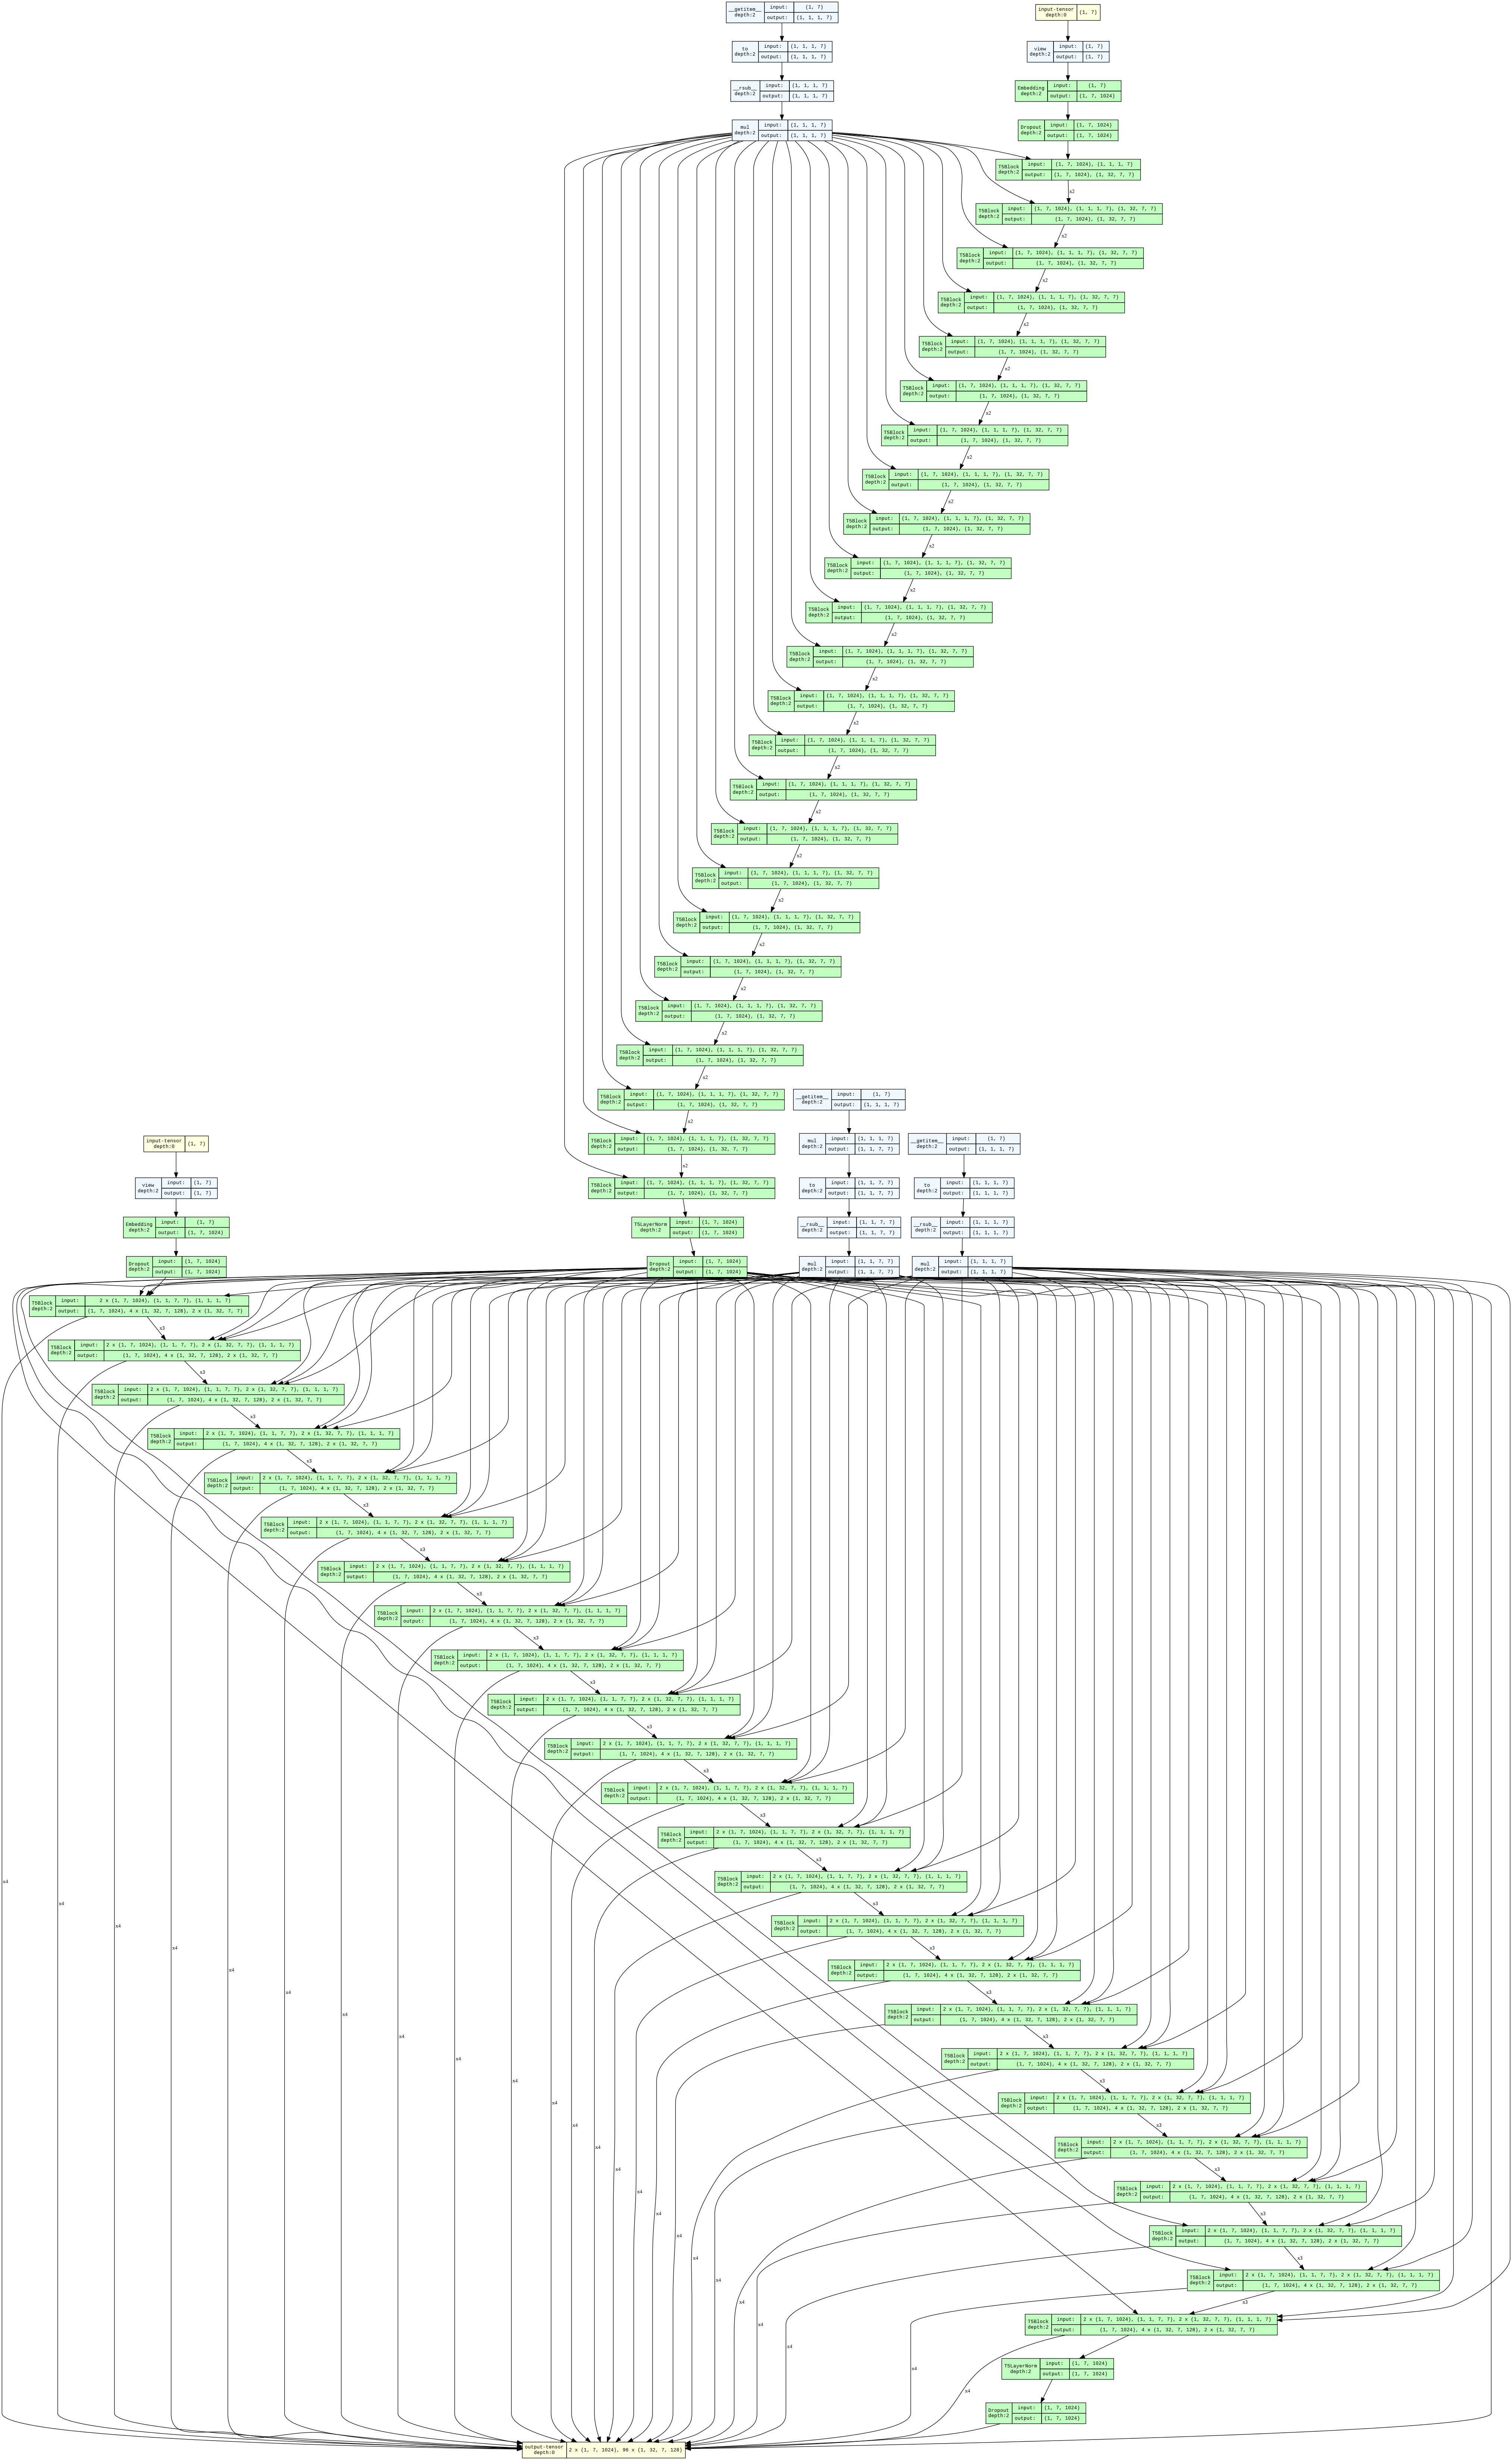

In [9]:
model_graph_1.visual_graph